# Importing Classes

In [17]:
import pickle
import pandas as pd
from nltk import sent_tokenize
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk 
import os

# Importing Data

In [18]:
# Load Pickled Dataframe from Cleaning Notebook into a DataFrame
path = r"C:\Users\Andrew\Documents\Metis\NLP_Inaugural_Addresses\Pickled_Files\cleaned_addresses.pkl"

df = pickle.load(open(path,'rb'))
df.head()

,president_number,term,pres_name,pres_det,president_x,address,party,Year,time_period
0,1,1,Washington,1 Washington,01.Washington.1.txt,AMONG the vicissitudes incident to life no eve...,Nonpartisan,1789,pre-1800
1,1,2,Washington,2 Washington,01.Washington.2.txt,I AM again called upon by the voice of my coun...,Nonpartisan,1793,pre-1800
2,2,1,JAdams,1 JAdams,02.JAdams.1.txt,"WHEN it was first perceived, in early times, ...",Federalist,1797,pre-1800
3,3,1,Jefferson,1 Jefferson,03.Jefferson.1.txt,CALLED upon to undertake the duties of the fi...,Democratic-Republican,1801,1800-1850
4,3,2,Jefferson,2 Jefferson,03.Jefferson.2.txt,"PROCEEDING, fellow-citizens, to that qualific...",Democratic-Republican,1805,1800-1850


# EDA

### Total sentences

In [19]:
# Number of sentences
df['total_sentences'] = df['address'].apply(lambda x: len(sent_tokenize(x)))

<AxesSubplot:xlabel='pres_name', ylabel='total_sentences'>

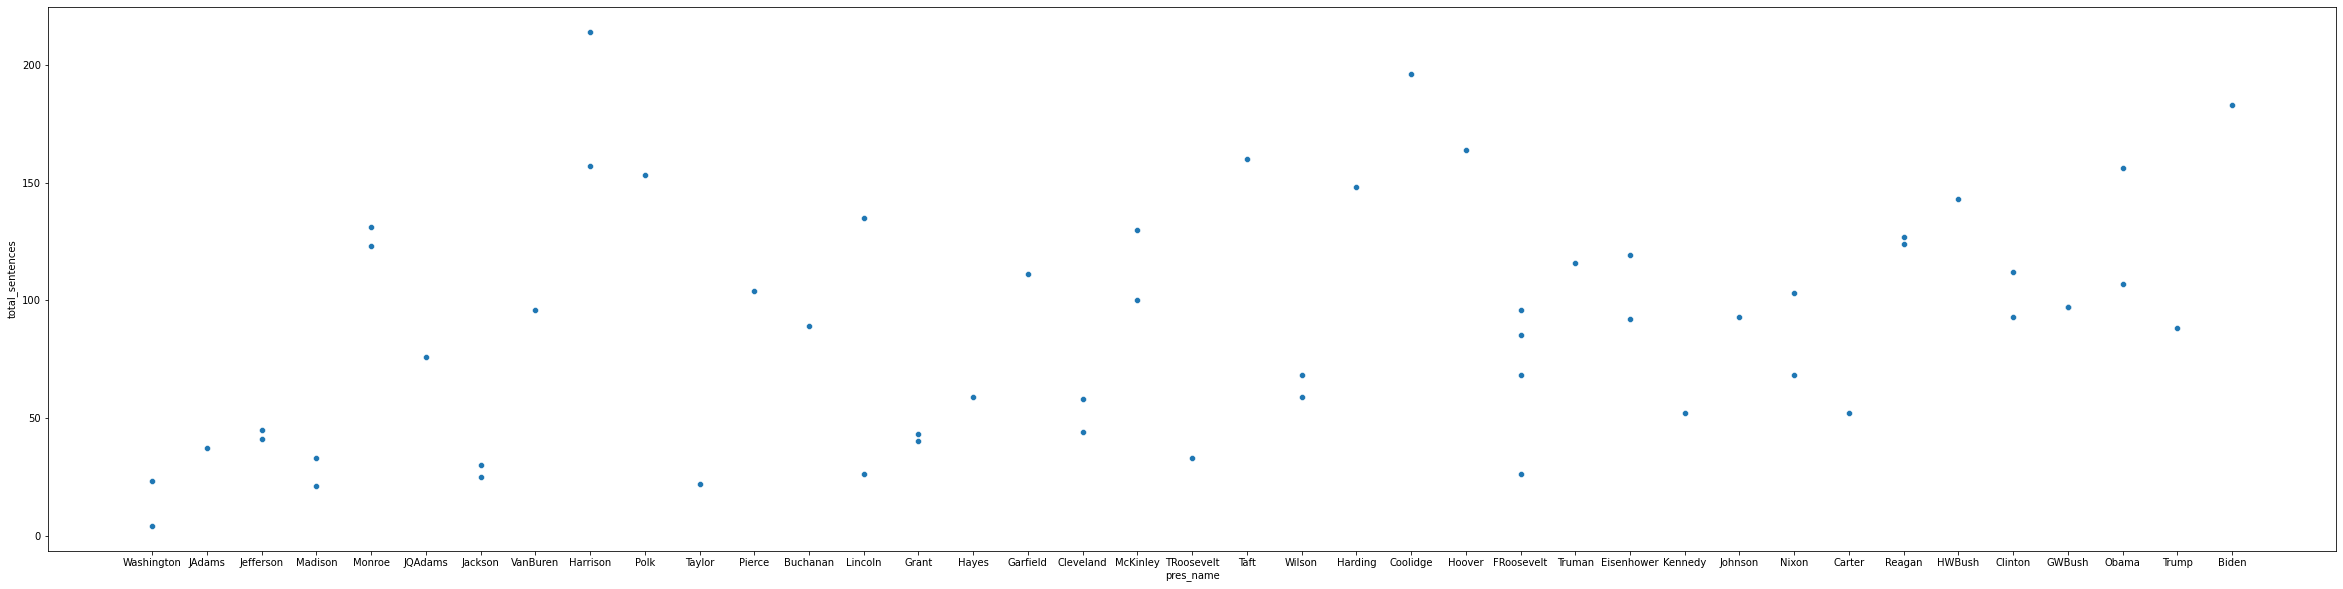

In [20]:
# Draw lineplot
fig_dims = (41, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(y="total_sentences", x="pres_name",data=df,ax=ax)

### Word Count

In [21]:
# Number of words
df['total_words'] = df['address'].apply(lambda x: len(word_tokenize(x)))

<AxesSubplot:xlabel='pres_name', ylabel='total_words'>

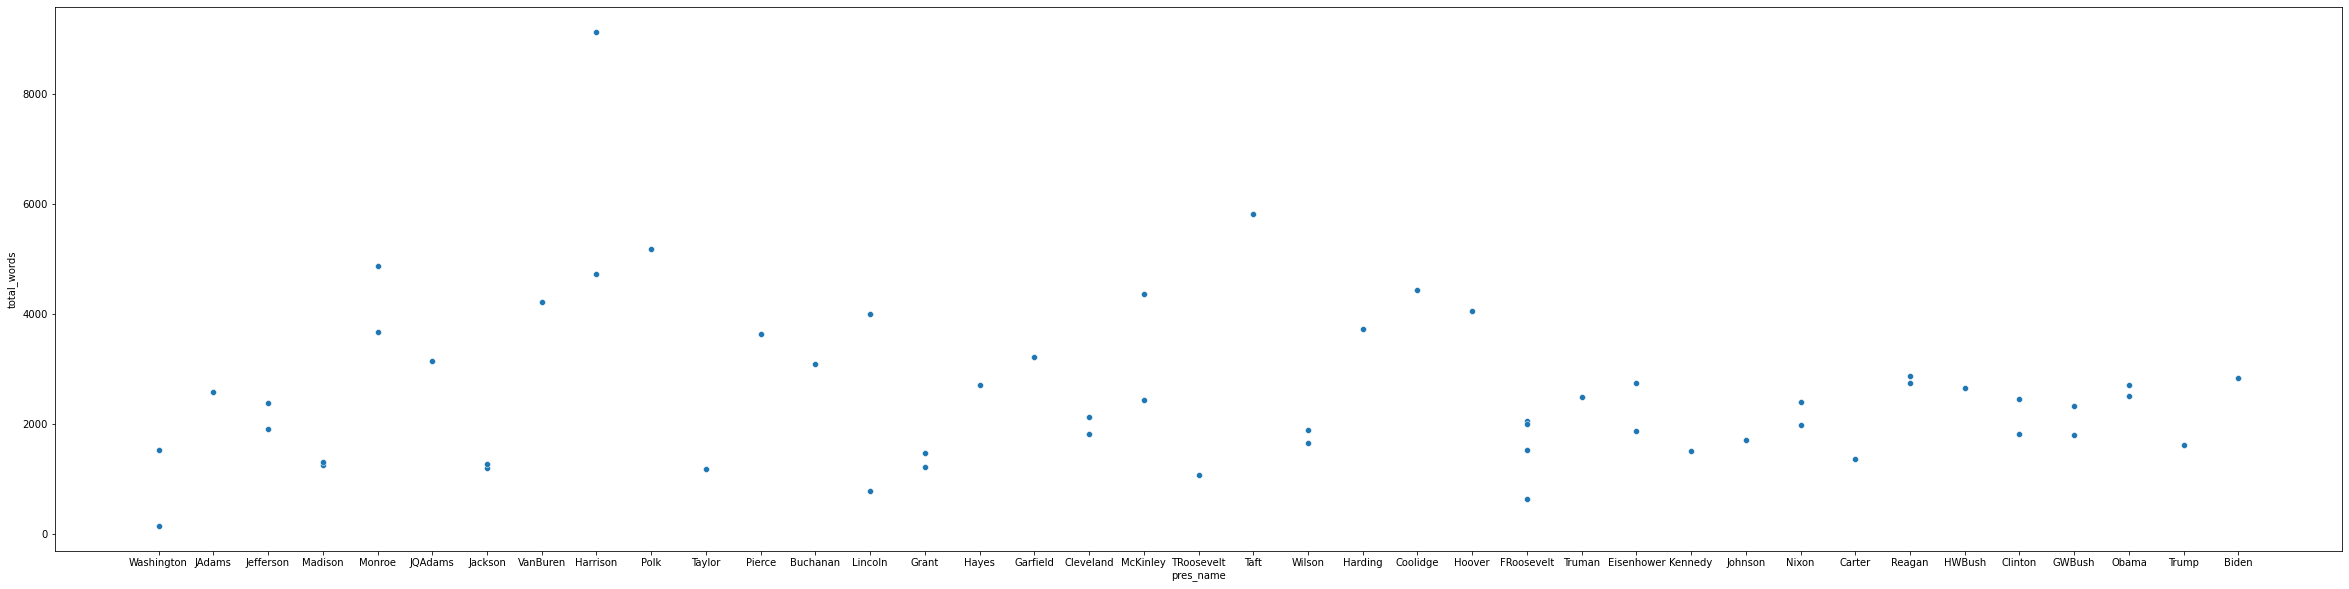

In [22]:
# Draw lineplot
fig_dims = (41, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(y="total_words", x="pres_name",data=df,ax=ax)

## Words / Sentence

In [23]:
# Number of words / sentence
df['words_per_sentence'] = df['total_words']/df['total_sentences']

<AxesSubplot:xlabel='pres_name', ylabel='words_per_sentence'>

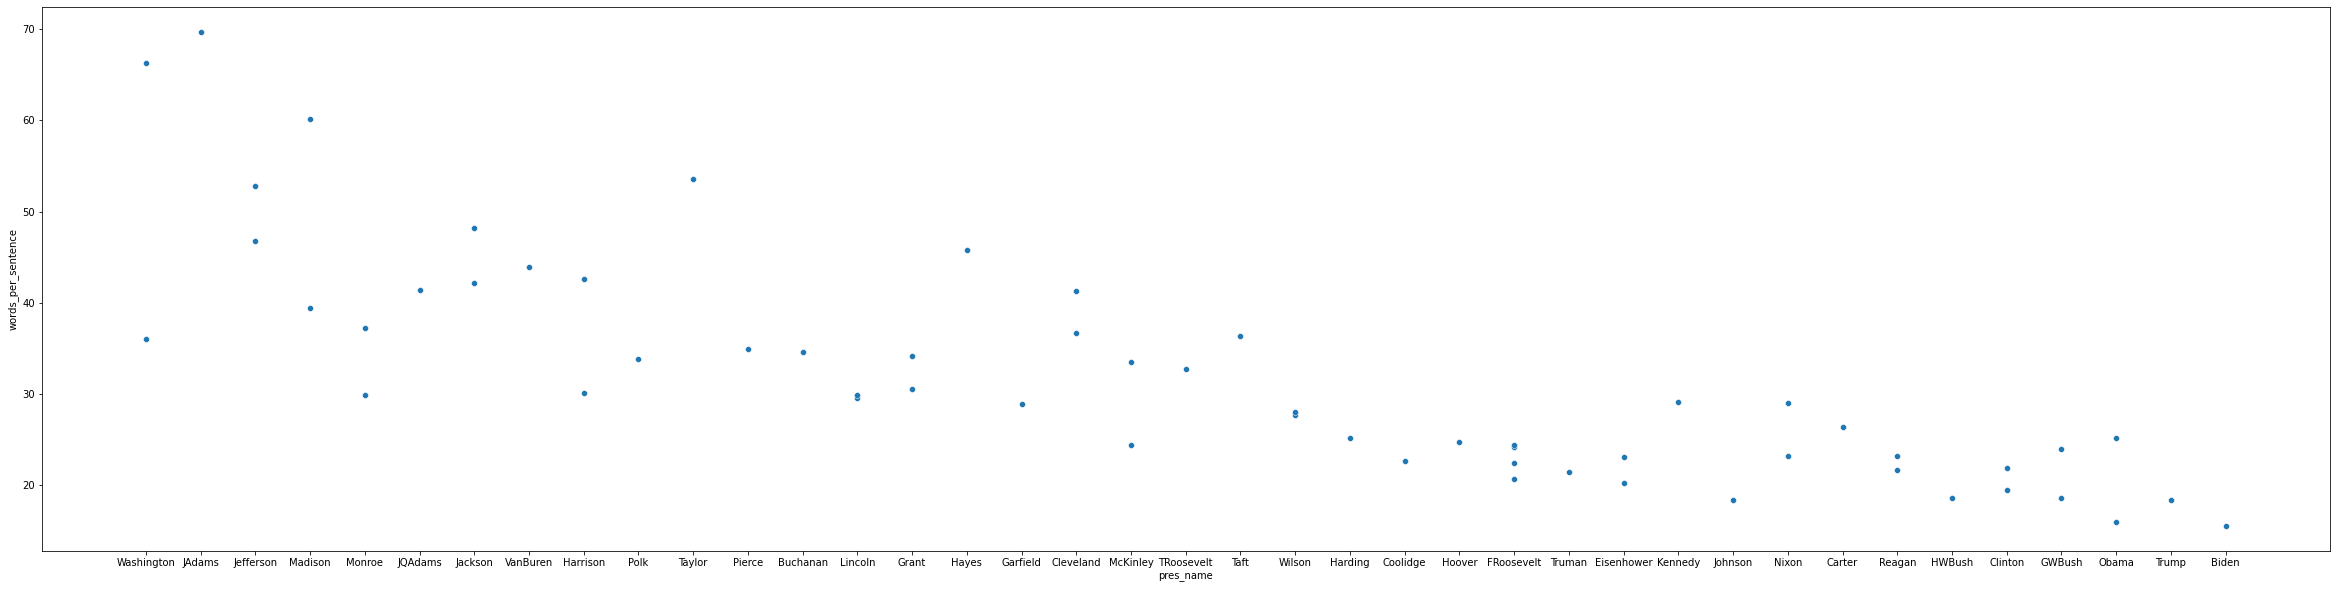

In [24]:
# Draw lineplot
fig_dims = (41, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(y="words_per_sentence", x="pres_name",data=df,ax=ax)

## Counting the occurence of "We" vs. "I" (Total and Ratio)

In [25]:
my_vocabulary = ["i","we"]

In [26]:
text = df['address']

# Define Count Vectorizer
vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b')

# call `fit` to build the vocabulary
vectorizer.fit_transform(my_vocabulary)

# finally, call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

In [27]:
# Convert sparse array to numpy array
x_back = x.toarray()

In [28]:
# Create Word Matrix and merge with original matrix

df_i_we = pd.DataFrame(x_back, columns=vectorizer.get_feature_names())
df = pd.concat([df,df_i_we],axis=1)

# Create a column for ratio of we / i
df['I_We_Ratio'] = df['we']/df['i']

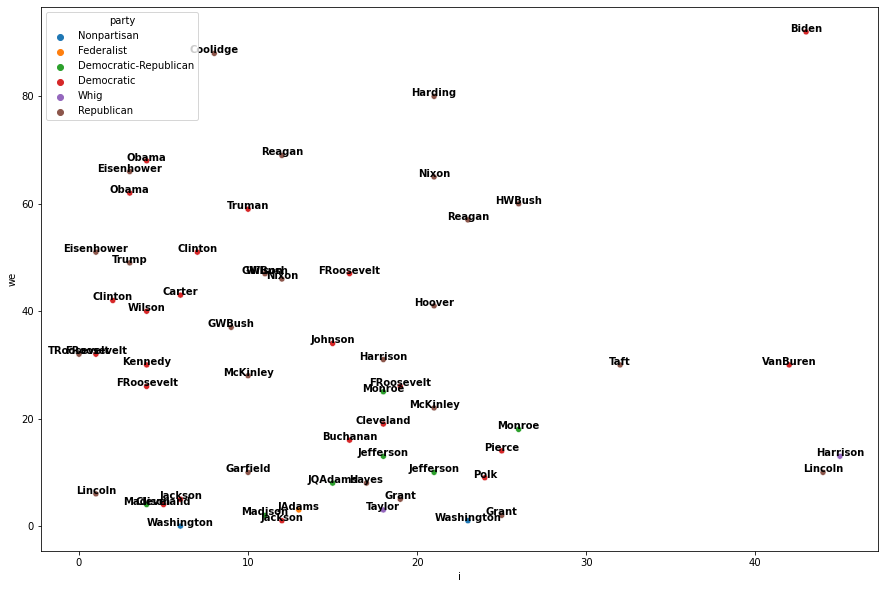

In [29]:
#Create figure
plt.figure(figsize = (15,10))

# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(x = df.i, y = df.we, hue = df.party)

#For each point, we add a text inside the bubble
for line in range(0,df.shape[0]):
     ax.text(df.i.iloc[line], df.we.iloc[line], df.pres_name.iloc[line], horizontalalignment='center', size='medium', color='black', weight='semibold')

<AxesSubplot:xlabel='pres_name', ylabel='I_We_Ratio'>

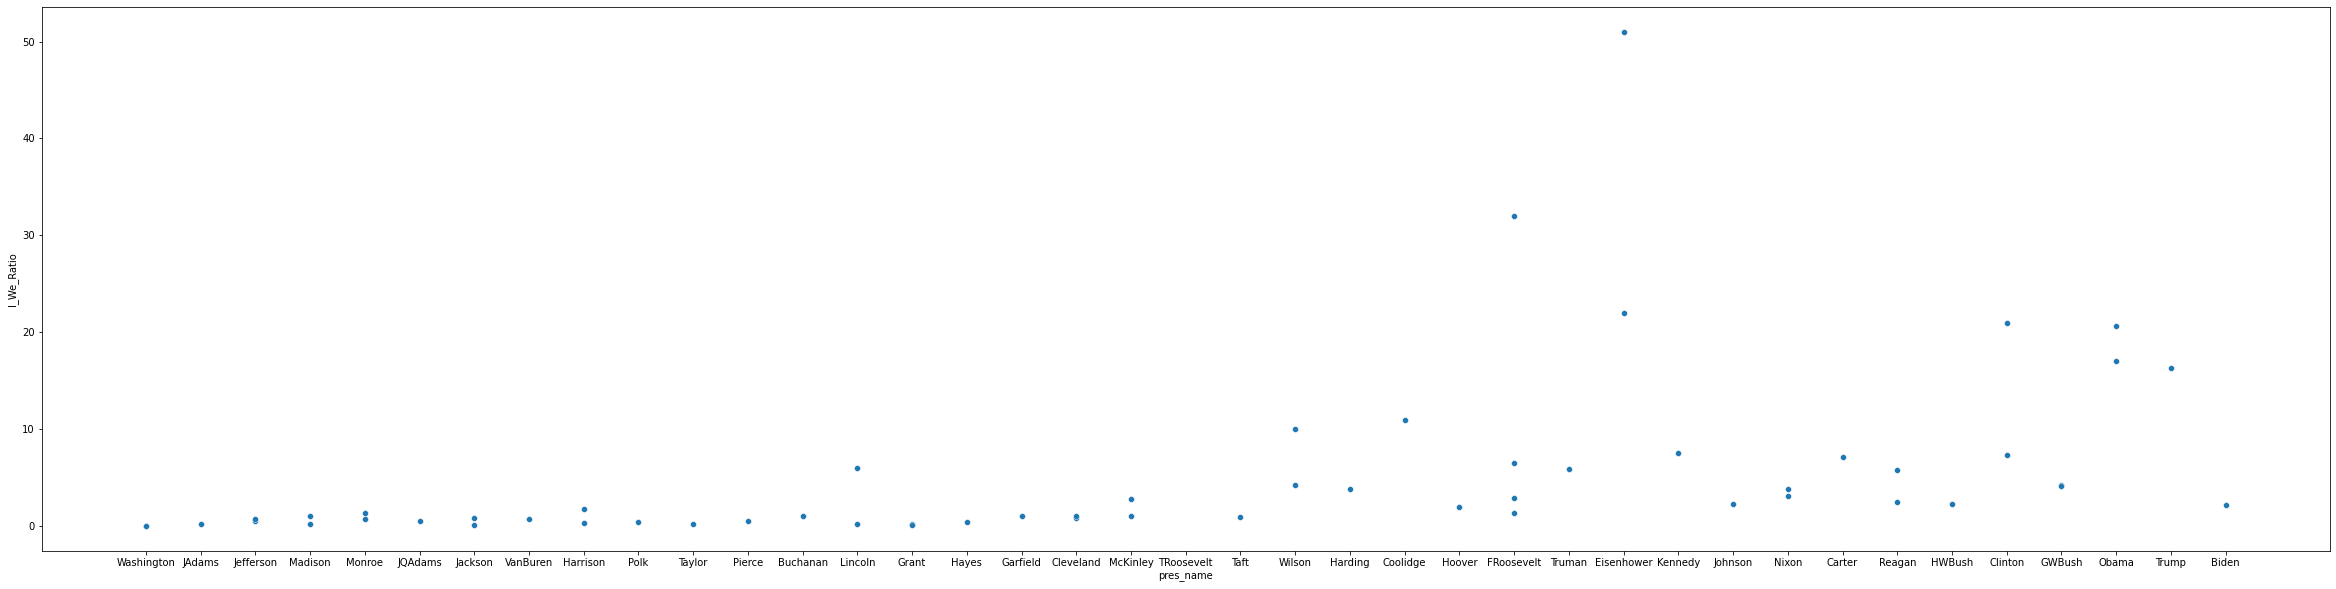

In [31]:
# Draw lineplot
fig_dims = (41, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(y='I_We_Ratio', x="pres_name",data=df,ax=ax)

In [32]:
## Save to csv for tableau data visualization

In [33]:
# Set file path to send csv for tableau visualization
path = r"C:\Users\Andrew\Documents\Metis\NLP_Inaugural_Addresses\Data\Visualization"

In [34]:
df.columns

Index(['president_number', 'term', 'pres_name', 'pres_det', 'president_x',
       'address', 'party', 'Year', 'time_period', 'total_sentences',
       'total_words', 'words_per_sentence', 'i', 'we', 'I_We_Ratio'],
      dtype='object')

In [35]:
df_eda = df[['pres_name','pres_det','party', 'Year', 'time_period', 'total_sentences', 'total_words',
            'words_per_sentence', 'i', 'we', 'I_We_Ratio']]

In [36]:
df_eda.to_csv(os.path.join(path,r'eda.csv'))

In [37]:
df_eda.head()

,pres_name,pres_det,party,Year,time_period,total_sentences,total_words,words_per_sentence,i,we,I_We_Ratio
0,Washington,1 Washington,Nonpartisan,1789,pre-1800,23,1524,66.260870,23,1,0.043478
1,Washington,2 Washington,Nonpartisan,1793,pre-1800,4,144,36.000000,6,0,0.000000
2,JAdams,1 JAdams,Federalist,1797,pre-1800,37,2578,69.675676,13,3,0.230769
3,Jefferson,1 Jefferson,Democratic-Republican,1801,1800-1850,41,1916,46.731707,21,10,0.476190
4,Jefferson,2 Jefferson,Democratic-Republican,1805,1800-1850,45,2374,52.755556,18,13,0.722222
